# Blockchain development research

- This is a research of popularity and features of various different blockchain development
  by analysing the questions and answers on the world number one programmer forum StackOverflow
- For updates [subscribe to newsletter](https://tradingstrategy.ai/community) or
  [follow on Twitter](https://tradingstrategy.ai/community)

In [31]:
import pandas as pd

from blockchain_stackoverflow import entertain_me
from blockchain_stackoverflow.helpers import clip_to_data_available_period

# Initialise notebook output
entertain_me()  

# Load our data
df = pd.read_parquet("blockchain-questions.parquet")
df = clip_to_data_available_period(df)

# StackOverflow - overall popularity

- We know the popularity of StackOverflow is in decline
- We need to calibrate any declining popularity in blockchain tech 
  to the overall declining popularity of StackOverflow

Text(0, 0.5, 'All StackOverflow posts per quarter')

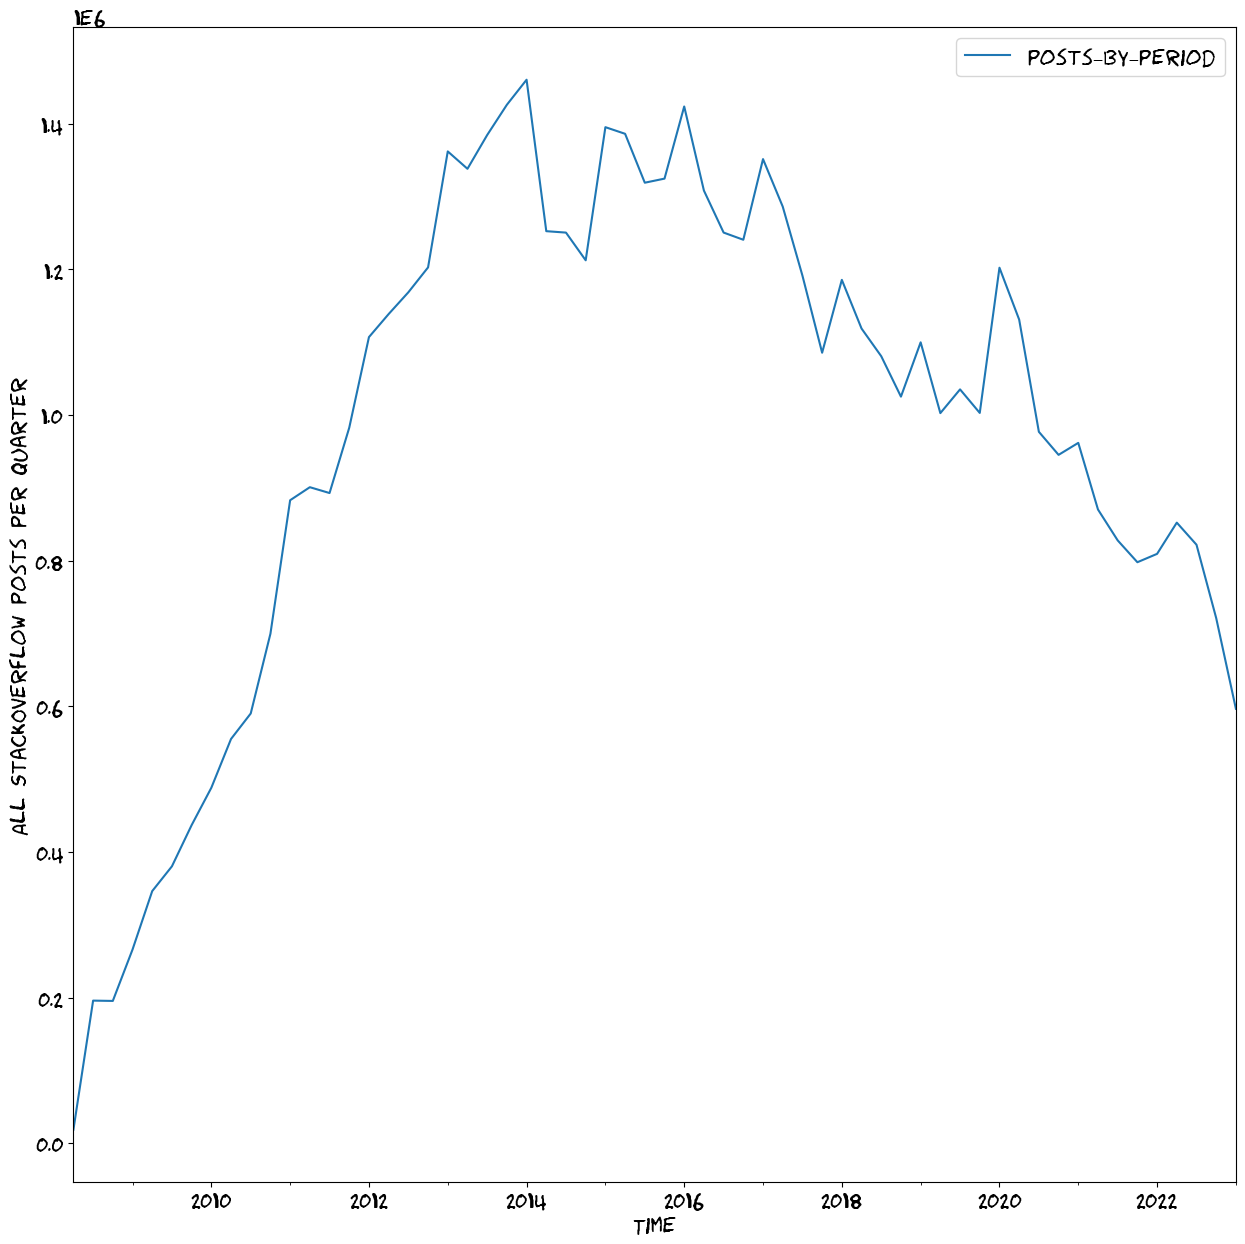

In [32]:
all_posts_quarterly = pd.read_parquet("post_counts_quarterly.parquet")
all_posts_quarterly = all_posts_quarterly[:pd.Timestamp("2023-05-31")]

ax = all_posts_quarterly.plot.line()
ax.set_xlabel("Time")
ax.set_ylabel("All StackOverflow posts per quarter")

## Blockchains - top developer interest

Plot the popularity of top three blockchains, as inferred from the domain specific knowledge.

- Ethereum, Bitcoin, Solana and Near Protocol have so much developer interest that it does not make sense
  to plot them on the same scale with the other chains

**Note**: This chart is absolute post numbers and not adjusted to the overall decline of StackOverflow.

Text(0, 0.5, 'Top blockchain StackOverflow posts per quarter')

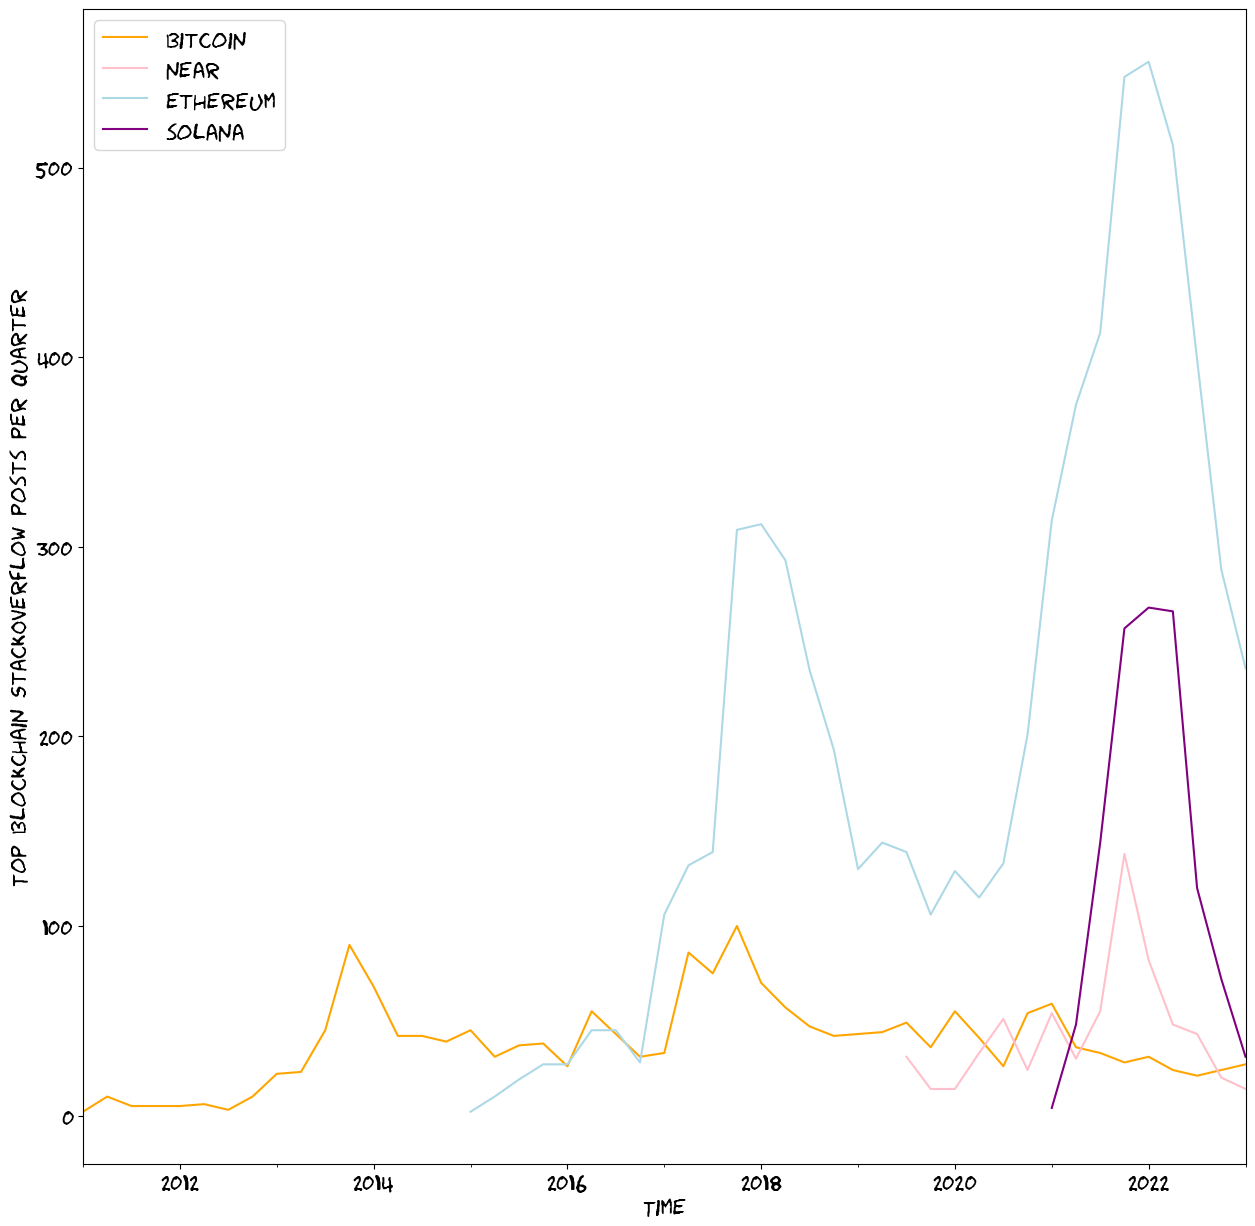

In [33]:
from blockchain_stackoverflow.helpers import create_binned_df_by_tags

quaterly_binned = create_binned_df_by_tags(df, {
    "bitcoin": ("bitcoin", "bitcoind", "bitcoinj"),
    "near": ("nearprotocol", "near"),
    "ethereum": ("ethereum",),
    "solana": ("solana", "solana-cli"),
})

ax = quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Top blockchain StackOverflow posts per quarter")

## Adjusted top developer interest 

- Here we present blockchain posts as % overall posts of StackOverflow
- This accounts for any general trends of StackOverflow usage



In [34]:
# How many % of all SO.com question we are
adjusted_quaterly_binned = quaterly_binned.div(all_posts_quarterly["posts_by_period"], axis="index") * 100


KeyError: 'posts_by_period'

/Users/moo/Library/Caches/pypoetry/virtualenvs/trade-executor-0IMGzMxl-py3.10/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/moo/Library/Caches/pypoetry/virtualenvs/trade-executor-0IMGzMxl-py3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


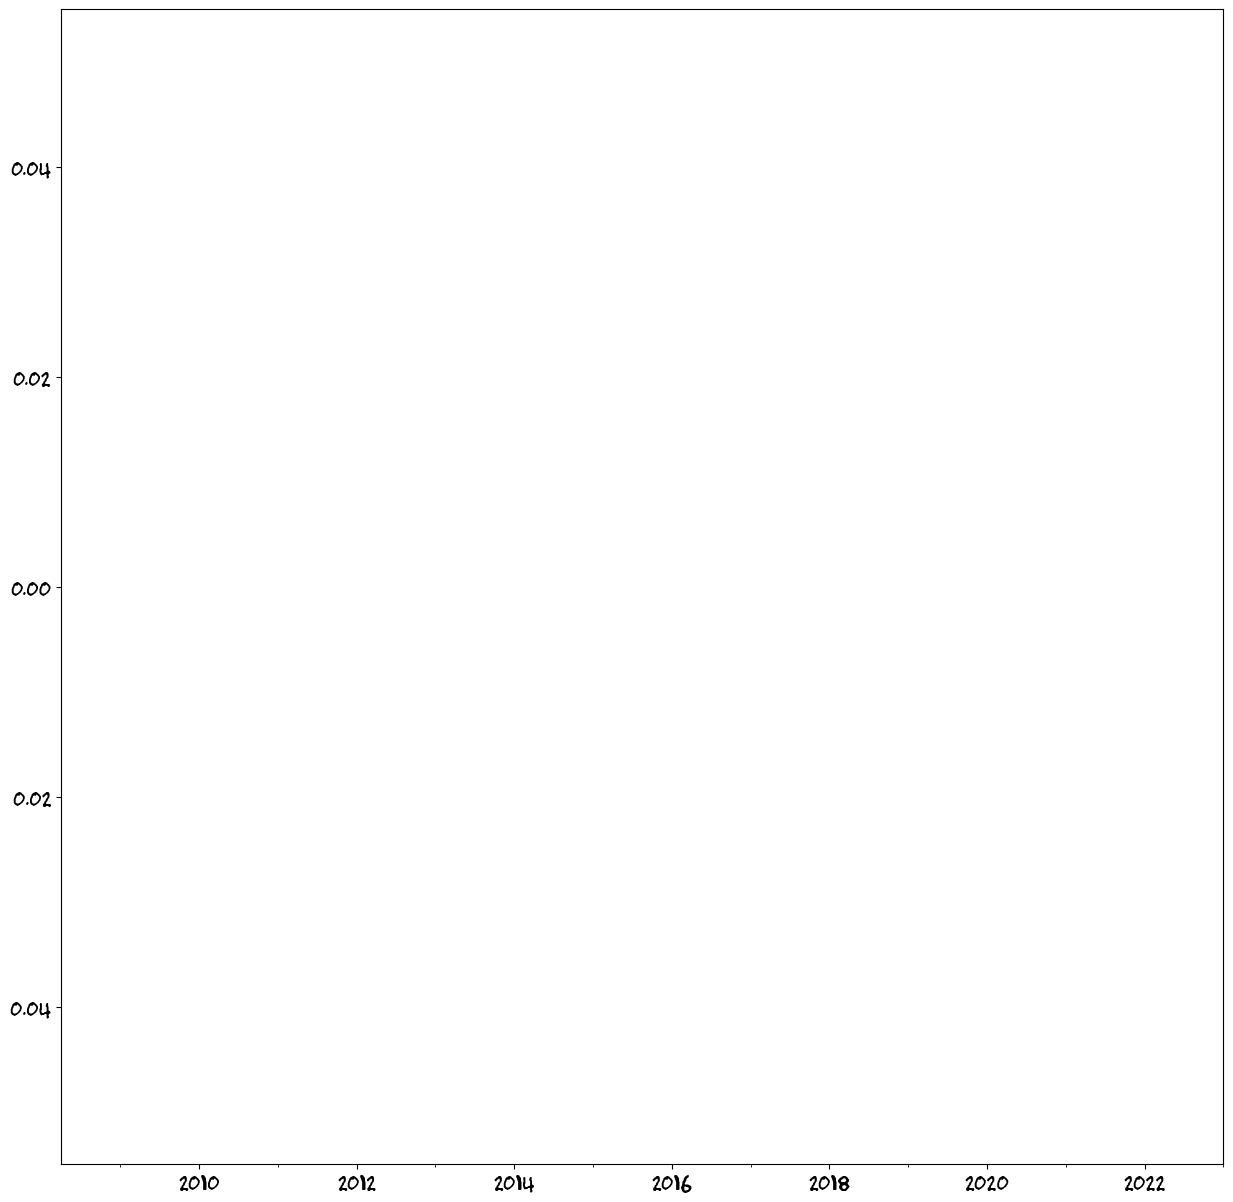

In [35]:
adjusted_quaterly_binned = quaterly_binned / all_posts_quarterly

ax = adjusted_quaterly_binned.plot.line(
    color={
        "bitcoin": "orange",
        "ethereum": "lightblue",
        "solana": "purple",
        "near": "pink",
    }
)

ax.set_xlabel("Time")
ax.set_ylabel("Top blockchain posts - StackOverflow popularity adjusted")